1\. **Reductions**

Given the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

   1. find the total mean
   2. find the mean for each row and column

In [1]:
import numpy as np
m = np.arange(12).reshape((3,4))
print("mean:",np.mean(m))
print("mean along the columns:", m.mean(axis=0))
print("mean along the rows:", m.mean(axis=1))

mean: 5.5
mean along the columns: [4. 5. 6. 7.]
mean along the rows: [1.5 5.5 9.5]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [4]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
print("Product using outer in numpy:",np.outer(u,v))
# Using list comprehension
outer_product_list_comp = np.array([i * v for i in u])
print("Product using for loop in numpy:",outer_product_list_comp)
# Using NumPy broadcasting
outer_product_broadcast = u[:, np.newaxis] * v
print("Product using broadcasting in numpy:",outer_product_broadcast)

Product using outer in numpy: [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Product using for loop in numpy: [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Product using broadcasting in numpy: [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a $10 \times 6$ matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [5]:
matrix = np.random.uniform(0, 3, size=(10, 6))
mask = matrix < 0.3
matrix[mask] = 0
print("the mask:", mask, '\n')
print("Original Matrix:")
print(matrix)

the mask: [[False False False False False False]
 [False False  True False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False  True]
 [False  True False False False False]
 [False False False  True False  True]
 [False  True False False False False]
 [False False False False False False]
 [ True False False False False False]] 

Original Matrix:
[[0.93092235 0.50344836 1.46097279 0.39374956 2.00722455 1.05600618]
 [0.4974277  1.47747502 0.         1.73154433 0.97013    0.94815254]
 [2.10059817 1.31699874 1.58886436 2.3730565  2.86827893 2.05155255]
 [0.67545392 1.71766512 0.89407731 1.79191213 2.49464303 0.335843  ]
 [0.31422689 1.67875643 2.36018452 0.60483748 1.84457422 0.        ]
 [1.51506879 0.         1.979565   2.96238792 2.0885463  1.08268392]
 [1.40031311 2.95887265 2.57730507 0.         1.74332414 0.        ]
 [0.93434574 0.         1.12129639 2.52219091 0.77014198 2.57966728]
 [2.74469511 2.24470271 0.39

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the `sin` and `cos` functions and indicate graphically (with a line or a marker) where they are close

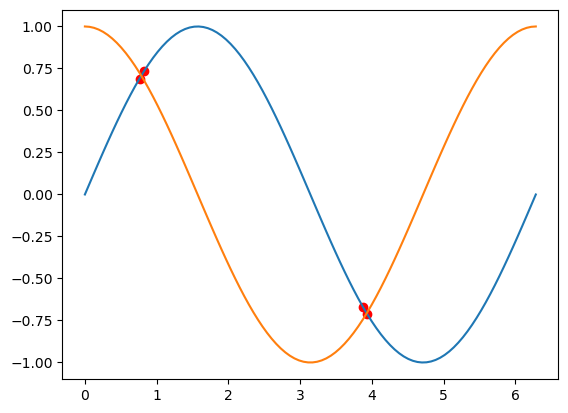

In [8]:
import matplotlib.pyplot as plt
arr = np.linspace(0, 2 * np.pi, 100)
every_10th = arr[::10]
reversed_arr = arr[::-1]
indices_close = np.where(np.abs(np.sin(arr) - np.cos(arr)) < 0.1)
elements_close = arr[indices_close]
plt.plot(arr, np.sin(arr), label='sin(x)')
plt.plot(arr, np.cos(arr), label='cos(x)')
plt.scatter(elements_close, np.sin(elements_close), color='red', label='Close points')
plt.show()

5\. **Matrices**

Create a matrix that shows the $10 \times 10$ multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [9]:
n = 10  # size of the matrix
multiplication_table = np.fromfunction(lambda i, j: (i + 1) * (j + 1), (n, n), dtype=int)

# Find the trace of the matrix
trace = np.trace(multiplication_table)

# Extract the anti-diagonal matrix
anti_diagonal = np.diag(np.fliplr(multiplication_table))

# Extract the diagonal offset by 1 upwards
diagonal_offset_1_up = np.diag(multiplication_table, k=1)

# Print the results
print("Multiplication Table Matrix:")
print(multiplication_table)

print("\nTrace of the Matrix:", trace)

print("\nAnti-diagonal Matrix:")
print(anti_diagonal)

print("\nDiagonal Offset by 1 Upwards:")
print(diagonal_offset_1_up)


Multiplication Table Matrix:
[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]

Trace of the Matrix: 385

Anti-diagonal Matrix:
[10 18 24 28 30 30 28 24 18 10]

Diagonal Offset by 1 Upwards:
[ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: `0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448`

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [10]:
positions_miles = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

distances_miles = np.abs(positions_miles - positions_miles[:, np.newaxis])

# Conversion factor from miles to kilometers
miles_to_km = 1.60934

# Converting distances to kilometers
distances_km = distances_miles * miles_to_km

print("2D Grid of Distances (Miles):")
print(distances_miles)

print("\n2D Grid of Distances (Kilometers):")
print(distances_km)


2D Grid of Distances (Miles):
[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

2D Grid of Distances (Kilometers):
[[   0.       318.64932  487.63002 1184.47424 1401.73514 1890.9745
  2373.7765  2484.82096 3078.66742 3939.66432]
 [ 318.64932    0.       168.9807   865.82492 1083.08582 1572.32518
  2055.12718 2166.17164 2760.0181  3621.015  ]
 [ 487.63002  168.9807     0.       696.84422  914.10512 1403.34448
  1886.14648 1997.19094 2591.0374  3452.0343 ]
 [1184.47424  865.82492  696.84422    0.       217.2609   7

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Construct a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [11]:
import numpy as np
import timeit

def sieve_of_eratosthenes(n):
    is_prime = np.ones(n + 1, dtype=bool)
    is_prime[0:2] = False  # 0 and 1 are not prime
    
    for i in range(2, int(np.sqrt(n)) + 1):
        if is_prime[i]:
            is_prime[i * i : n + 1 : i] = False  # Mark multiples of i as not prime

    return np.nonzero(is_prime)[0]

def find_primes_mask(N):
    mask = np.ones(N + 1, dtype=bool)
    mask[0:2] = False  # 0 and 1 are not prime

    for i in range(2, int(np.sqrt(N)) + 1):
        if mask[i]:
            mask[i * i : N + 1 : i] = False  # Mark multiples of i as not prime

    primes = np.nonzero(mask)[0]
    return primes

# Choose N (start with N=99)
N = 99

# Measure the time for find_primes_mask
time_mask = timeit.timeit(lambda: find_primes_mask(N), number=1000)

# Measure the time for sieve_of_eratosthenes
time_sieve = timeit.timeit(lambda: sieve_of_eratosthenes(N), number=1000)

print(f"Prime numbers using find_primes_mask({N}):")
print(find_primes_mask(N))

print(f"\nPrime numbers using sieve_of_eratosthenes({N}):")
print(sieve_of_eratosthenes(N))

print(f"\nTime taken for find_primes_mask({N}): {time_mask:.6f} seconds")
print(f"Time taken for sieve_of_eratosthenes({N}): {time_sieve:.6f} seconds")


Prime numbers using find_primes_mask(99):
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]

Prime numbers using sieve_of_eratosthenes(99):
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]

Time taken for find_primes_mask(99): 0.003468 seconds
Time taken for sieve_of_eratosthenes(99): 0.013476 seconds


8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

In [ ]:
# Random seed for reproducibility
np.random.seed(42)

# Number of walkers and steps
num_walkers = 1000
num_steps = 200

# Simulate random walks using randint to create a 2D array
walks = np.random.choice([-1, 1], size=(num_walkers, num_steps))

# Calculate walking distances for each walker
distances = np.cumsum(walks, axis=1)

# Take the square of the distances array (element-wise)
squared_distances = distances**2

# Compute the mean of squared distances at each step
mean_squared_distances = np.mean(squared_distances, axis=0)

# Optional: Plot the average distances as a function of time
plt.plot(np.arange(1, num_steps + 1), mean_squared_distances, label='Mean Squared Distance')
plt.xlabel('Time Step')
plt.ylabel('Mean Squared Distance')
plt.title('Random Walk: Mean Squared Distance vs Time')
plt.legend()
plt.show()
